### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection adn Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
# print first 5 rows  in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statisical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation

#### 1. Positive Correlation
#### 2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

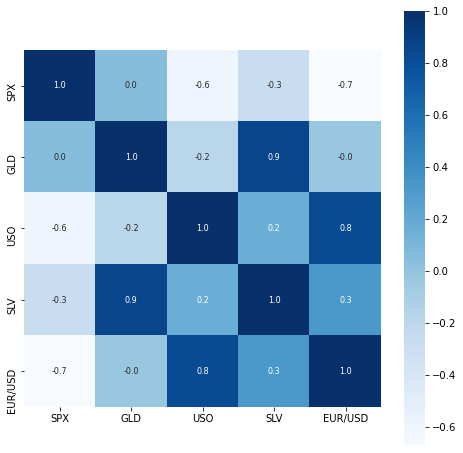

In [10]:
# constructing a headtmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True , fmt='.1f', annot=True , annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Pouriya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

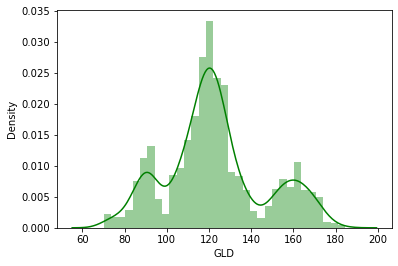

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

#### Splitting the Features and Target

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

#### Splitting into Training data and Test Data

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=2)

### Model Training : Random Forest Regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# training the model
regressor.fit(X_train ,y_train)

RandomForestRegressor()

### Model Evaluation

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.65989946  81.96349992 115.7735001  127.7073009  120.75300153
 154.53069792 150.3325987  126.12330013 117.45639866 126.05280081
 116.64150101 172.25890077 141.65299857 167.87089855 115.15990021
 117.88840028 140.83090333 170.12070076 159.55690287 158.61999925
 154.91960012 124.88649999 175.84429971 157.28390306 125.23220034
  93.69109935  76.99300026 120.8108     119.19099973 167.51470002
  88.20090089 125.28959963  91.08700044 117.65890008 121.11959927
 136.28170126 115.53020101 115.21690095 148.75480043 107.5709008
 104.00570235  87.2137978  126.51230055 117.94160023 153.24669848
 119.67059996 108.30480036 108.27799823  93.05280054 127.02369819
  74.62390056 113.6687991  121.18650049 111.24339913 118.81199868
 120.84919915 158.41300085 167.21190137 147.14219678  86.05679887
  94.30710046  86.70589902  90.48649999 118.97950056 126.45740087
 127.43429989 169.439      122.26819947 117.35279907  98.74860072
 168.47950107 142.98669788 131.88870217 121.11960178 120.60059959
 119.749600

In [21]:
# R Squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.9888584206520614


Compare the actual Values and Predicted Values in Plot

In [22]:
y_test = list(y_test)

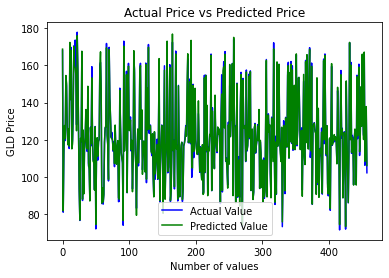

In [25]:
plt.plot(y_test , color='blue' , label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()